# INFO 2950 Final Project
Tina Chen (tc663), Catherine Fang (cf533), Vicki Chen (vc332)

## Table of Contents:
1. [Introduction](#introduction)
2. [Data Description and Cleaning](#data-description)
    - [Raw Dataset Description](#raw-data-description)
    - [Appendix: Cleaned Dataset Description](#cleaned-data-description)
3. [Preregistration Statements](#preregistration-statements)
    - [1: Multivariable Logistic Regression](#preregistration-1)
    - [2: Original Currency and Success Rate](#preregistration-2)
4. [Data Analysis](#data-analysis)
    - [Overall Successs of Campaigns Over Time](#campaigns-over-time)
        - [Overall Success by Category](#overall-success-by-category)
        - [Categorical Success Rate Over Time](#categorical-success-rate-over-time)
    - [Multivariable Logistic Regression (Duration, Campaign Goal and Success)](#predicted-sucess-campaign-goal-campaign-duration)
        - [Campaign Goal vs Predicted Success Rate](#campaign-goal-vs-predicted-success)
        - [Campaign Duration vs Predicted Success Rate](#campaign-duration-vs-predicted-success)
    - [Campaign's Original Currency vs Average Success Rate](#original-currency-vs-average-success)
        - [Average Success Rate - Horizontal Bar Graph](#avg-success-bar-graph)
        - [Average Success Rate - Box and Whisker Graph](#avg-success-box-and-whisker)
    - [Logit Regression](#logit-regression)
        - [Regression Validation, Cross Validation](#Cross-Validation)
    - [Binomial Distribution & Signifiance](#binomial-distribution)
        - [Binomial Distribution HKD](#binomial-distribution-hkd)
        - [Binomial Distribution MXN](#binomial-distribution-mxn)
5. [Evaluation of Significance](#evaluation-of-significance)
    - [Pre-registration 1 - Multivariable Logistic Regression](#eval-significance-1)
    - [Pre-registration 2 - Original Currency & Success Rate](#eval-significance-2)
6. [Interpretations and Conclusions](#conclusion)
7. [Limitations](#limitations)
8. [Source Code](#source-code)
9. [Acknowledgements and Bibliography](#acknowledgements)

## **Introduction** <a name="introduction"></a>

Kickstarter is a crowdfunding website that allows creators to create fundraising campaigns to fund startups, products, and projects to help them become a reality. Kickstarter campaigns have many factors that can influence how likely they are to successfully reach their target fundraising goal. These factors include category of the project, duration of a project, location the project is based in, original currency of the campaign, and number of backers. The focus of our research is to examine the factors that lead to a project being successful to identify any predictors of project success, and determine which are the best predictors. 

Previous research had been done on a similar Kickstarter datatset, mainly using R, with analyses on amount of projects per category and type of category on success. Results show that the Film & Video category has the greatest amount of projects, but though the Dance category has the smallest quantity, it has the highest success rate (Kim, 2024). However, this research only used linear regression models to predict the relationship between categories and success, and also took canceled and suspended projects into account. Our project takes a narrower view on success as a binary variable with unsuccessful being defined as a failed project, since canceled and suspended projects are projects that have been stopped prematurely due to unpredictable external factors.  We'll also implement logistic regression models rather than linear regressions using success as an a binary output. Further studies have been done on how other factors such as project size, goals, durations impact success rates, however, researchers had mainly focused on surface-level data exploration. In our project, we'll expand on past research on analyzing multiple predictors of success through hypothesis testing, and how they might correlate with one another to influence the outcome of a campaign. 

Research Question: Are there any relationships between the predictors (category of project, campaign goal, duration of project, original currency type) and the success of a Kickstarter project?
- What is the relationship between the category of the campaign and the average campaign goals for each category, by success vs failed projects? Are the two correlated with one another, and which influence success more? 
  - Which category has the highest number of successful campaigns?
  - Which year has the most projects that were successful?
  - Is there a optimal project duration to optimize chances of success?
- How do projects' success rates compare considering the projects' orignal currencies? 
  - Which currencies have the highest success rate and which categories have the lowest success rate? Are these success rates significantly higher and/or lower than campaigns that use other currencies?

Findings to this project can help individuals with potential Kickstarter campaign ideas optimize their chances of success when launching a Kickstarter campaign. It can also give aspiring business people data insights that allow them to understand their project's categorical and original currency success rate in the context of past Kickstarter campaigns.

## **Data Description and Data Cleaning** <a name="data-description"></a>

### Raw Dataset Description <a name="raw-data-description"></a>

The attributes (columns) of the clean dataset are the PID (Project ID), Category (numbers indicating what topic the project falls under), Subcategory (numbers indicating the subtopics within each category), the Project Location Name, State, County, and Country. Other relevant attributes included are the Project Currency, the Project’s Original Goal (how much money the creators were aiming for), amount of money pledged, the number of backers, the launched date, deadline date, and state. State is defined as either suspended (funding for a project is stopped when the project violates Kickstarter’s rules), canceled (the creators of a project dropped the project themselves), failed (the project didn’t meet funding goals), and successful (project meets funding goals). Each observation (row) corresponds to one unique project, indexed with a CaseID.

The raw dataset was created by Jonathan Leland, Kickstarter’s Head of Insights for a cross-sectional study on the different creative projects that seek crowdfunding. He created the dataset to observe data on the projects from Kickstarter. 

The creation of this dataset is funded by Kickstarter Data, the company crowdfunding platform that directs the Kickstarter Project. The study is distributed through the Inter-University Consortium for Political and Social Research (ICPSR). 

Some columns were presented as optional for users to fill out, so in the raw data there are some rows with missing values. For example, for the PROJECT_LOCATION_STATE, PROJECT_LOCATION_COUNTY, PROJECT_LOCATION_COUNTRY column, there are rows with blank values. However, there are no missing values in the PROJECT_LOCATION_NAME, meaning that the project creators were required to put down the location name for their project. 

ICPSR processed the data by creating variable/value labels, creating an online analysis version with question text, and 
checked the data for undocumented or out-of-range codes. In addition, several restrictions were placed on the data before releasing it for public use to ensure survey participant anonymity. The data was split into a public-use file, a restricted-use file, and file containing information on the backers of projects. 

ICPSR datasets are checked for condidentiality of survey participants. The names of the people/groups who created past Kickstarter projects (NAME) and the links to their projects’ websites (URL_NAME), and the descriptions of their projects (BLURB) are not shown in the public data set that was used as the raw dataset for this project. This ensures anonymity of survey participants and prevents disclosure risk from survey participants.

Raw Data was collected by downloading the delimited data from the study https://www.icpsr.umich.edu/web/ICPSR/studies/38050/summary.


### Appendix: Cleaned Dataset Description <a name="cleaned-data-description"></a>

The cleaned dataset was tailored according to our research questions. We dropped redacted information (NAME, PROJECT_PAGE_LOCATION_COUNTRY, URL_NAME) and other attributes we did not need to answer our research question ("SUBCATEGORY", "UID", "PROJECT_PAGE_LOCATION_STATE", "PROJECT_PAGE_LOCATION_COUNTY").

We kept the Category, PROJECT_PAGE_LOCATION_NAME, PROJECT_CURRENCY, GOAL_IN_ORIGINAL_CURRENCY, PLEDGED_IN_ORIGINAL_CURRENCY, GOAL_IN_USD, PLEDGED_IN_USD, BACKERS_COUNT, LAUNCHED_DATE, DEADLINE_DATE, and STATE attributes since we directly need them to find relationships between their impact on the STATE (success or failure of the project). We also renamed these variables to make it more clear when referencing them in our data analysis.

This version of the clean dataset was created by Tina Chen (tc663), Catherine Fang (cf533), and Vicki Chen (vc332) to find any predictors of a Kickstarter project's success and gain insights from past Kickstarter projects to help future Kickstarter campaigns succeed and avoid any predictors of failure. The creation of this dataset was not funded.

Since the raw dataset was created from survey data and survey participants were from a wide variety of countries with many different languages, the survey's collected data may be subject to participant error, misinterpretations, and language barriers. In addition, only the public dataset was available for public download, and thus, the NAME, PROJECT_PAGE_LOCATION_COUNTRY, and URL_NAME were not available and could only be found in the restricted dataset. In addition, since our research question only took into consideration factors for predicting the success and failure of a project, we did not include canceled or suspended projects in our cleaned dataset. 

Preprocessing of the raw dataset was done by Jonathan Leland and distributed by the Inter-University Consortium for Political and Social Research (ICPSR). Details of the preprocessing can be found in the Raw Dataset Description section, found above.

As above, in the raw dataset, the anonymity of survey particpants was preserved during the creation of the raw dataset and we did not attempt to violate their anonymity during the creation of this cleaned dataset. Survey particpants expected the raw dataset to be used for research purposes only, provided their anonymity was not preserved, but we are able to use the publically available dataset since the preprocessing of the public dataset preserved survey particpants' anonymity.

# **Preregistration Statements** <a name="preregistration-statements"></a>

### **1. Multivariable Logistic Regression** <a name="preregistration-1"></a>

#### **Hypothesis: Multiple variables will be correlated with better predictions of a whether a campaign is likely to succeed or not.**

Both hypotheses will have a null hypothesis that the respective independent variable's coefficient is 0, which would indicate that the variable has no effect on success.
 - Hypothesis 1: Lower campaign goal would not require as many people to pledge to the campaign compared to a campaign with a higher campaign goal to reach the goal and be successful, so we hypothesize that projects with a lower campaign goal will be correlated with a higher success rate. The alternative hypothesis is that campaign goal coefficient is less than 0.

 - Hypothesis 2: Longer campaign duration may allow for more backers to support and pledge to the campaign, increasing the chances of the campaign to be successful so, we expect that projects with a larger time difference between launch and deadline will have a greater likelihood of success. The alternative hypothesis is that campaign goal coefficient is less than 0. 

#### **Procedure**:
A logistic regression with multiple variables will be performed to determine if success is greater with multiple predictors as inputs. These predictors will be duration of project, and campaign goal. These inputs were chosen as they are factors that are determined before a campaign is launched compared to variables such as number of backers or amount pledged, which are variables determined after a campaign is launched. Performing a multivariable regression may help to explain how there are many factors that can lead to the success of a campiagn, which can not be explained by just one factor. We'll perform a one-sided hypothesis test to check the significance of the relationship through the beta coefficient and its p-value. 

We will split the data into training and testing sets, and use a significance level of alpha = 0.05. 

Permutation tests will also be performed on the variables to see if the data is significant or it is just by chance.

### **2. Original Currency vs Success Rate** <a name="preregistration-2"></a>

It was found in Phase 2 (Exploratory Data Analysis) that the average success rate of all currencies is 0.459, the minimum average success rate is 0.346 and is MXN (Mexican Pesos), and the maximum average success rate is 0.698 and is HKD (Hong Kong Dollars). 

There is a range of 15 different original currencies that Kickstarter campaigns have used when collecting funds. These currencies are listed in order of most number of successful campaigns: (USD, GBP, EUR, CAD, AUD, HKD, MXN, SEK, JPY, SGD, NZD, DKK, CHF, NOK, PLN). 

#### **Hypotheses:** 
- a. Reject the null hypothesis that HKD is not statistically more successful than other Kicktarter campaigns, on average. 
- b. Fail to reject the null hypothesis that MXN is not significantly less successful than other Kickstarter campaigns, on average.

1 - The Null Hypothesis, H<sub>0</sub>, is that the original currency HKD is not significantly more successful than other Kickstarter campaigns, on average. 
The Alternative Hypothesis, H<sub>1</sub>, is that HKD is signficantly more successful than other Kickstarter campaigns, on average.

2 - The Null Hypothesis, H<sub>0</sub>, is that the original currency MXN is not significantly less successful than other Kickstarter campaigns, on average. 
The Alternative Hypothesis, H<sub>1</sub>, is that MXN is signficantly less successful than other Kickstarter campaigns, on average.

#### **Procedure:**
We will make a box plot of the average success rates grouped by currency. We will then create a randomly generated binomial probability distribution based on the probability distribution of the currencies in these hypotheses and any outliers shown on the box plot.

We will then calculate the z-scores of each currency and compare it to a currency that is closer to a currency that is closest to the mean success rate to determine whether or not to reject these hypotheses.

## **Data Analysis** <a name="data-analysis"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, \
    precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import seaborn as sns
import duckdb
import statsmodels.api as sm
from sklearn import preprocessing
import math
from scipy.stats import ttest_ind

Below we imported our cleaned data (kickstarter_data.csv). More detailed data cleaning steps can be found in the data_cleaning.ipynb file.

In [2]:
kickstarter_data = pd.read_csv("kickstarter_data.csv")
kickstarter_data.head()

,category,project_location,original_currency,goal_original_currency,pledged_orginal_currency,goal_usd,pledged_usd,num_backers,success,duration_in_days,launched_year
0,Games,Osaka,JPY,68000000,81030744,623968,743538,12613,1,40,2018
1,Games,Tokyo,JPY,53808516,481621841,510735,4571420,46307,1,33,2020
2,Games,Ishikawa,JPY,45000000,98863825,414327,910266,8051,1,8,2019
3,Games,Chiba-shi,JPY,16665000,23606140,148285,210047,1705,1,30,2018
4,Technology,Tokyo,JPY,15000000,17406300,133229,154601,656,1,60,2017


### Data Summary

We wanted to explore our dataset and determine how large of a dataset we are working with. We also wanted to find the success rate to determine how much of our dataset are successful projects. Since the success rate came out to be around 46.7%, this means our dataset is relatively equally split between successful and nonsuccessful campaigns, with slightly more nonsuccessful campaigns.

In [3]:
total = len(kickstarter_data)
success = kickstarter_data[kickstarter_data["success"] == 1].count()
print(f"Total Campaigns: {total}")
print(f"Success Rate {np.round(success["success"]/total, 3)}")

Total Campaigns: 539385
Success Rate 0.467


### Correlation Heat Map of Predictors

We plotted a correlation heat map to see if there are any strong correlations between our predictors that we plan to analyze. Since our main research question focuses on determining predictors of success, we wanted to make sure that there may not be any collinearity between variables. Since success in our dataset is a binary variable, we can not find the correlation between each factor and the success itself, so it was not included in the correlation map.

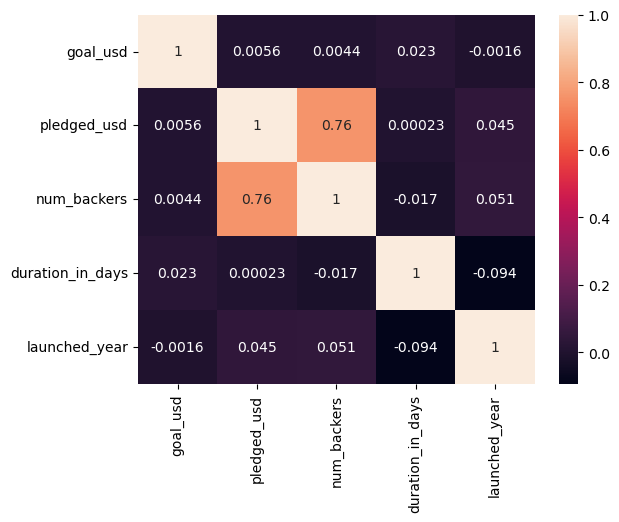

In [4]:
corr = kickstarter_data[["goal_usd","pledged_usd", "num_backers",
                         "duration_in_days", "launched_year"]].corr()
sns.heatmap(corr, annot = True)
plt.show()

This heatmap shows the correlation between different predictors of success. Since there is a high correlation between amount pledged in USD and the number of backers, this is an indicator of collinearity between these 2 factors, and we decided not to use these factors in our analysis due to this. The success column was not included in the correlation heat map because since it is a binary variable, the values shown on the heatmap would not provide meaningful information about the relationship between variables and success.

### **Campaigns Over Time** <a name="campaigns-over-time"></a>

We plotted the year the Kickstarter campaign was launched versus the number of Kickstarter campaigns in that year. We were curious if there was a relationship between the total campaigns launched per year and how many successful projects there were in each year. It may be possible the economy was better in certain years or Kickstarter might've been more popular during this time that prompted more campaigns to be launched.

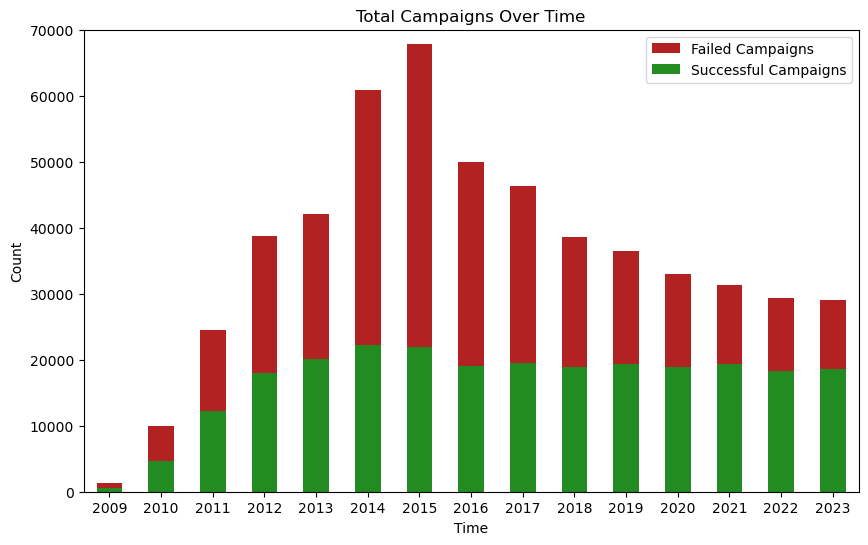

In [5]:
campaigns_by_yr = kickstarter_data["launched_year"].value_counts().sort_index(axis=0).plot(
                    kind= "bar", label = "Failed Campaigns", fontsize = 10, color = "firebrick")
campaigns_by_yr.set_xlabel("Year")
campaigns_by_yr.set_ylabel("Count")

success_proj = kickstarter_data[kickstarter_data["success"] == 1]
success_campaigns_by_yr = success_proj["launched_year"].value_counts().sort_index(axis=0).plot(
                    kind= "bar", rot = 0, figsize = (10, 6), fontsize = 10, 
                    label = "Successful Campaigns", color = "forestgreen")

plt.title("Total Campaigns Over Time")
plt.xlabel("Time")
plt.ylabel("Count")
plt.ylim(0,70000)
plt.legend()
plt.show()

Based on the bar graph, the most amount of campaigns were launched during 2015 and it seems that each year after 2012 have similar numbers of successful campaigns. This lack of successful campaigns in earlier years follows the trend of total campaigns and may be due to the lack of popularity of Kickstarter as it was founded in 2009. The years 2014 and 2015 are slightly higher than the rest of the years but not that significant, which indicates that the success of a campaign is fairly consistent throughout each year.

### **Categories** <a name="overall-success-by-category"></a>

#### Overall Success of Categories

We plotted the number of the Kickstarter campaigns in each category. We were also interested to see whether the most popular category would also have the most amount of successful campaigns and graphed how much of the total campaigns were successful for each category.

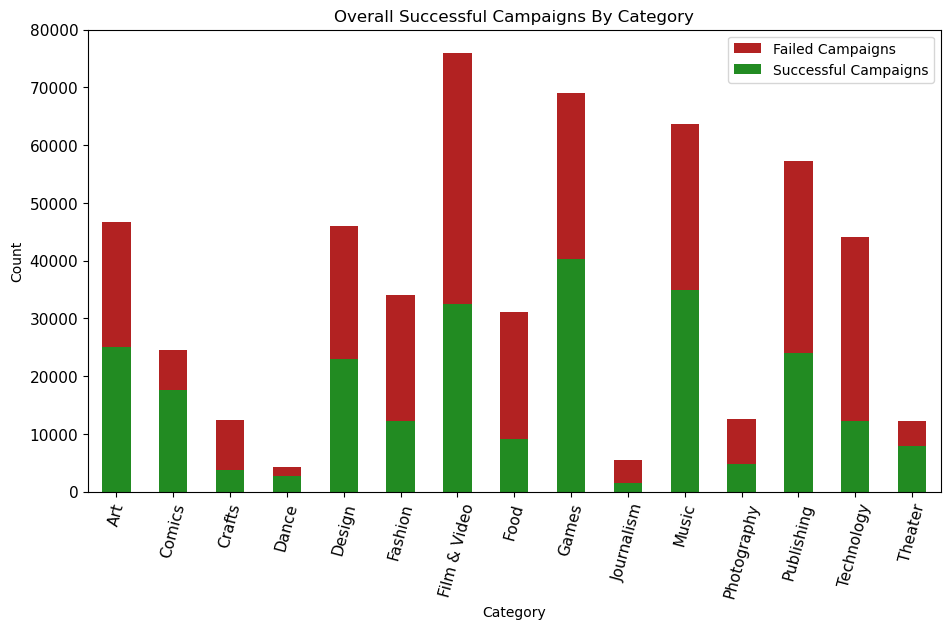

In [6]:
category = kickstarter_data["category"].value_counts().sort_index(axis=0).plot(kind= "bar", 
                    rot = 75, figsize = (11, 6), fontsize = 11, color = "firebrick",
                    label = "Failed Campaigns")

success_proj = kickstarter_data[kickstarter_data["success"] == 1]
scategory = success_proj["category"].value_counts().sort_index(axis=0).plot(kind= "bar", 
                    rot = 75, figsize = (11, 6), fontsize = 11, color= "forestgreen",
                    label = "Successful Campaigns")

plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Overall Successful Campaigns By Category")
plt.legend()
plt.ylim(0,80000)
plt.show()

The bar graph shows that the most common campaign category is "Film & Video". However, interestingly, the category "Games" has the most successful campaigns out of the all the categories, followed with "Music" as the second highest and "Film & Video" as the third highest.

#### Category Success Rate Over Time <a name="categorical-success-rate-over-time"></a>

While the above bar graphs show the overall success rate of each category, we were also interested in how the success rate changes over time. Thus, we plotted a line graph of success rate of each category.

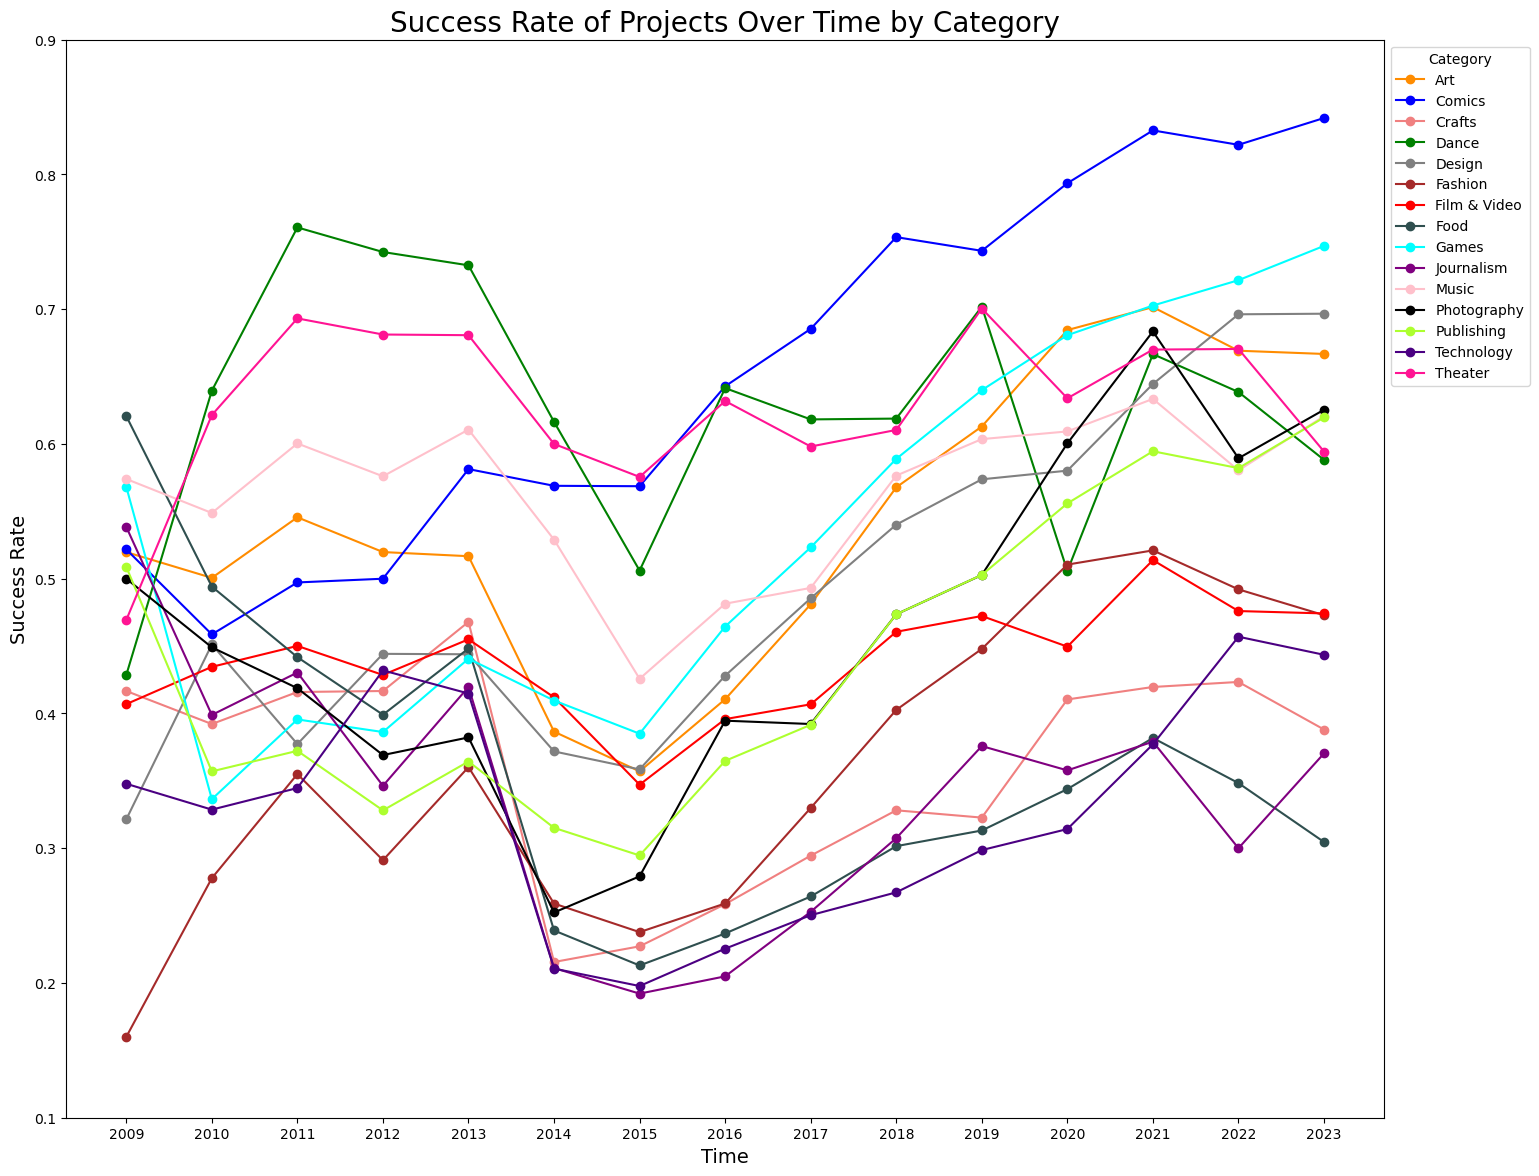

In [7]:
category_df = duckdb.sql(""" SELECT launched_year, category,
                            SUM(CASE 
                                WHEN success = 1 THEN 1 ELSE 0
                                END) * 1.0 / COUNT(*) AS success_rate
                            FROM kickstarter_data 
                            GROUP BY launched_year, category
                            ORDER BY launched_year, category
                            """).df()
unique_categories = category_df['category'].unique() 

category_colors = {"Art":"darkorange", "Comics": "blue", "Dance": "green", 
                    "Design": "gray", "Fashion": "brown", "Food": "darkslategray",
                    "Film & Video": "red", "Games": "cyan",
                    "Journalism":"purple", "Music": "pink", 
                    "Photography": "black", "Technology": "indigo",
                    "Theater": "deeppink", "Publishing": "greenyellow", 
                    "Crafts":"lightcoral"}
plt.figure(figsize=(17, 14)) 
for category in unique_categories: 
    category_data = category_df[category_df["category"] == category] 
    plt.plot(category_data["launched_year"], 
             category_data['success_rate'], marker='o', 
             color = category_colors.get(category), label=category)


plt.title("Success Rate of Projects Over Time by Category", fontsize = 20) 
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Success Rate", fontsize = 14) 
plt.ylim(.1, .9) 
plt.xticks(category_data["launched_year"].unique())
plt.legend(title = "Category", loc = "upper left", bbox_to_anchor = (1, 1))
plt.show()

This line graph over time is interesting as in the most recent years, Comics had the highest success rate of all the categories. It's also interesting to see there is a general increase of success rate after the year 2015, which was the year of the largest total number of campaigns launched. In the previous bar graph, we had determined that Games, Music and Film & Video were the top 3 categories with the most number of successful campaigns, listed in order of most to least. Film & Video interestingly had a relatively stable success rate around 0.4, while Games and Music both generally increased over time. 

### **Duration, Campaign Goal and Success** <a name="predicted-sucess-campaign-goal-campaign-duration"></a>

We wanted to see if success can be predicted from campaign goal and campaign duration because these two variables are two factors that are determined before a campaign is launched compared to variables such as number of backers or amount pledged, which are variables determined after a campaign is launched. goal_usd was log-transformed due to the large range of goal_usd compared to duration_in_days.

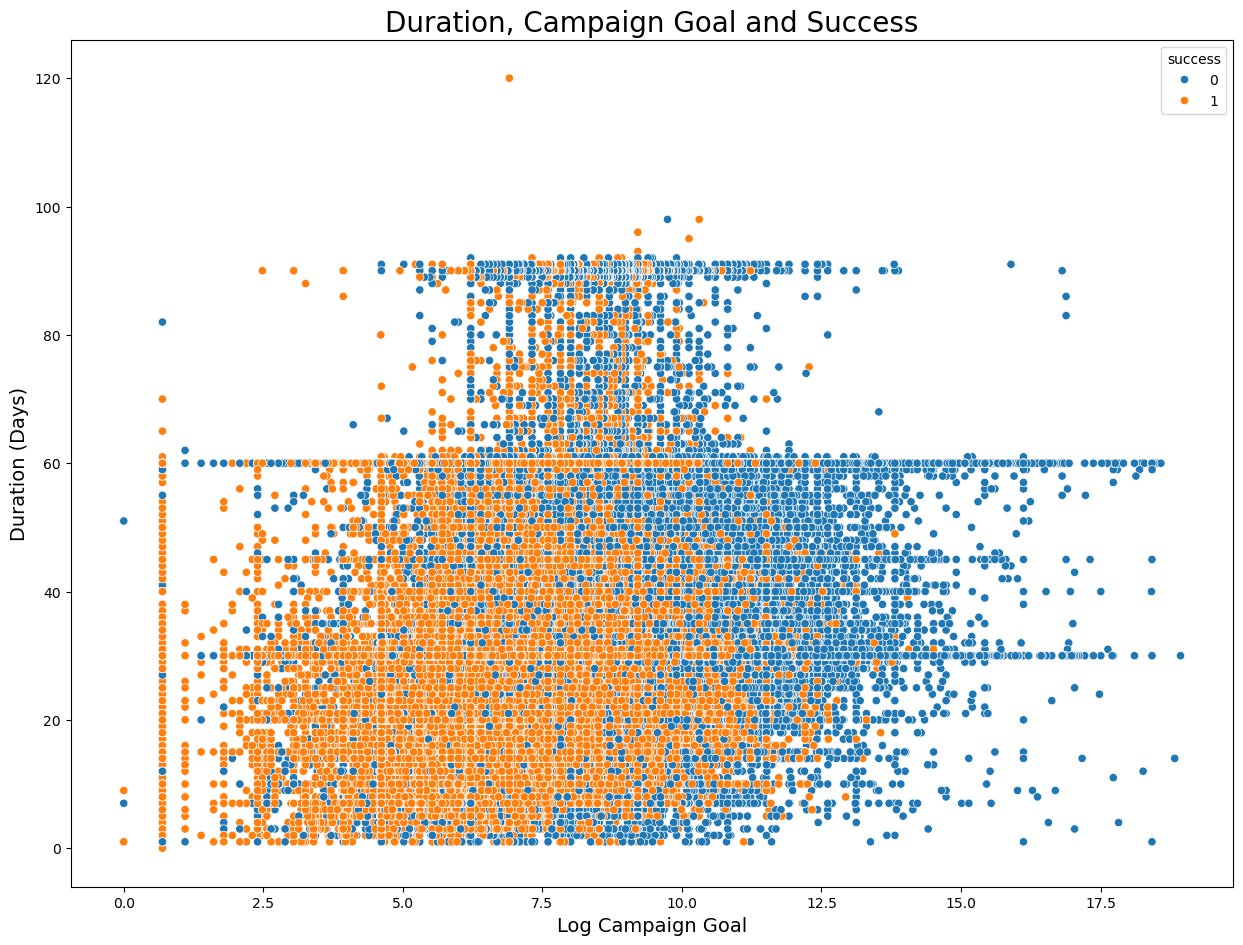

In [8]:
kickstarter_data["log_goal_usd"] = np.log(kickstarter_data["goal_usd"] + 1)
plt.figure(figsize=(15, 11)) 
sns.scatterplot(kickstarter_data, x = 'log_goal_usd', y = 'duration_in_days', 
                hue = 'success')
plt.title("Duration, Campaign Goal and Success", fontsize = 20) 
plt.xlabel("Log Campaign Goal", fontsize = 14)
plt.ylabel("Duration (Days)", fontsize = 14)
plt.show()

It seems that most campaigns are successful when the log_goal_usd is low and the duration_in_days is also lower. It seemed like a lot of data points were centered around the middle of the log_goal_usd, and there were a lot of points for the durations 30, 60 and 90 for campaign goal. We wondered if log_goal_usd and duration_in_days followed a normal distribution or not. 

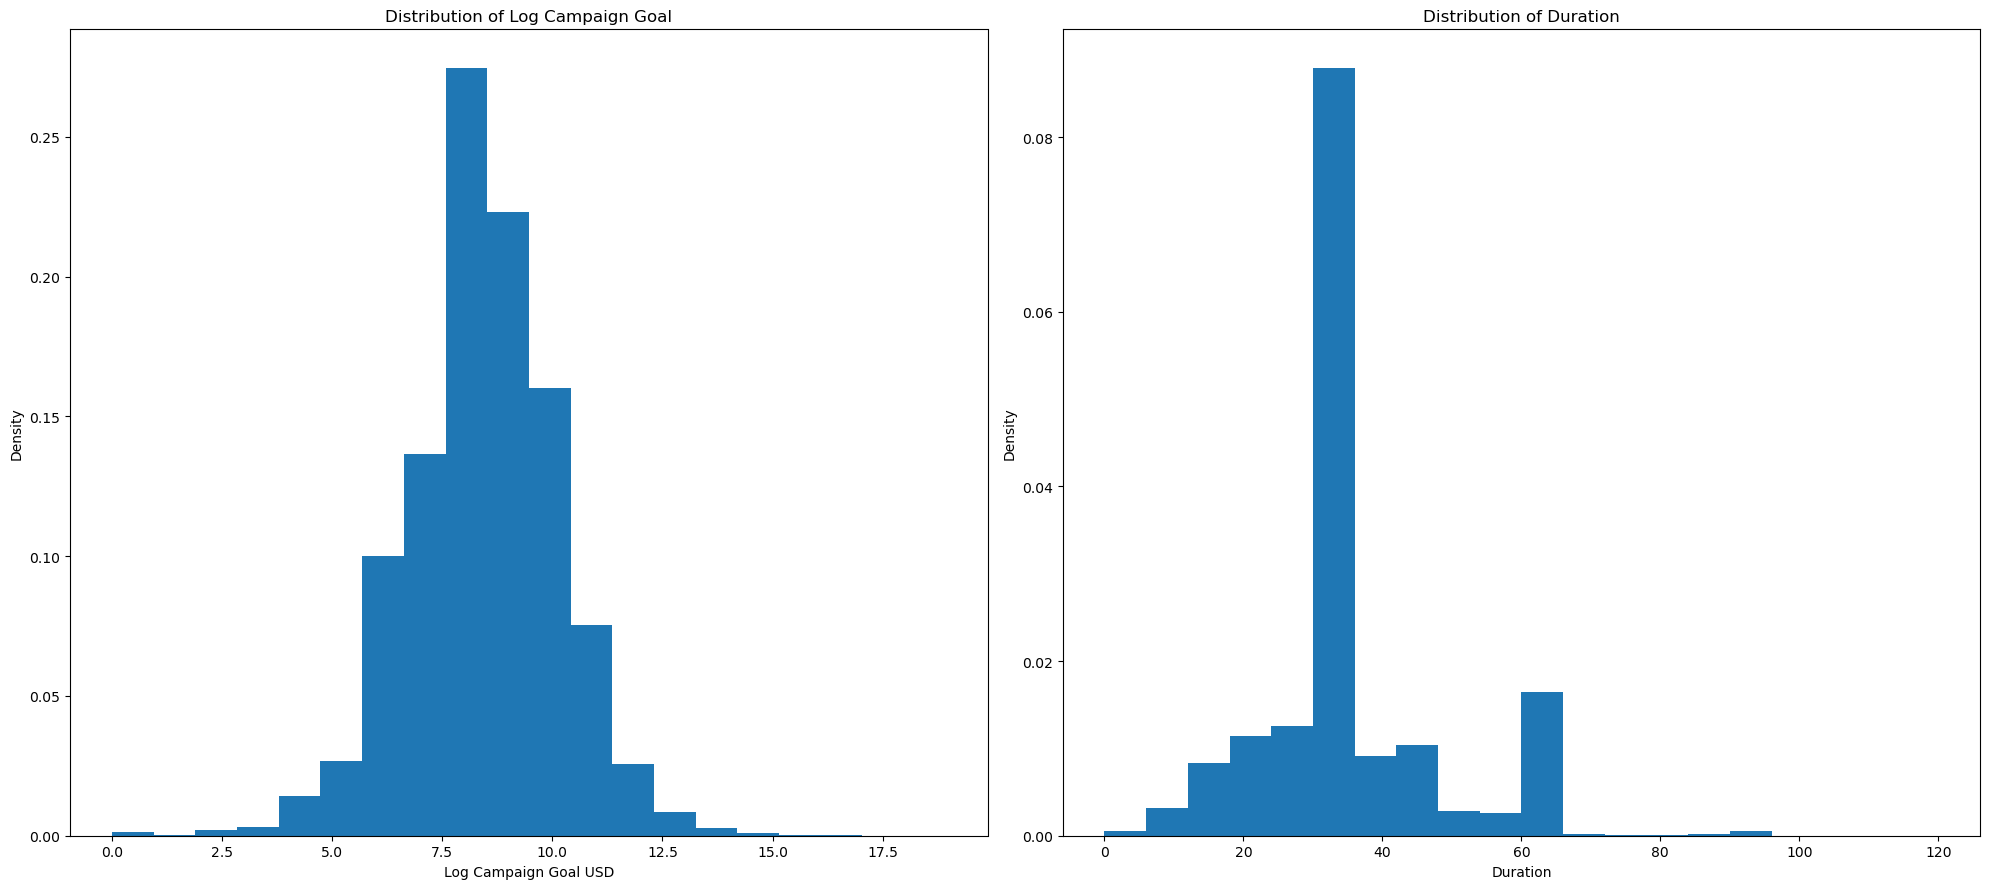

In [9]:
plt.figure(figsize = (20, 9))
plt.subplot(1, 2, 1)
plt.hist(kickstarter_data["log_goal_usd"], 20, density = 1)
plt.title("Distribution of Log Campaign Goal")
plt.xlabel("Log Campaign Goal USD")
plt.ylabel("Density")

plt.subplot(1, 2, 2)
plt.hist(kickstarter_data["duration_in_days"], 20, density = 1)
plt.title("Distribution of Duration")
plt.xlabel("Duration")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

The plotted histogram indeed shows that the data looks like it follows a normal distribution with a bell shape. This indicates that majority of the campaigns set their goal to be around the mean, around 1,808 - 8,103 range (7.5 - 9 log range).   

### **Campaign Goal** <a name="campaign-goal-vs-predicted-success"></a>

We wanted to run a regression on the campaign goal of a project and its probability of success to determine its relationship.

The model's coefficient is: -0.35
The model's intercept is: 2.79


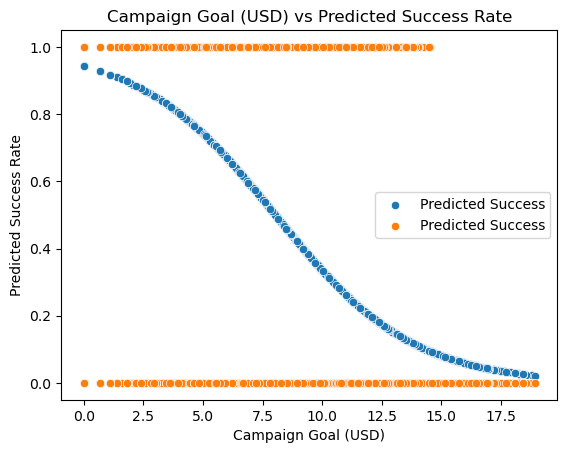

In [11]:
X1 = pd.DataFrame(kickstarter_data["log_goal_usd"])
y1 = pd.Series(kickstarter_data["success"])
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=2950)

goal_model = LogisticRegression().fit(X1_train,y1_train)

coefficient = np.round(goal_model.coef_[0][0], 2)
intercept = np.round(goal_model.intercept_[0], 2)
print(f"The model's coefficient is: {coefficient}")
print(f"The model's intercept is: {intercept}")

#Predicted success
goal_prediction = goal_model.predict_proba(X1)
kickstarter_data["goal_success_prediction"] = goal_prediction[:,1]
sns.scatterplot(kickstarter_data, x = "log_goal_usd", y = "goal_success_prediction",
                label = "Predicted Success")

sns.scatterplot(kickstarter_data, x = "log_goal_usd", y = "success",
                label = "Predicted Success")

plt.title("Campaign Goal (USD) vs Predicted Success Rate")
plt.xlabel("Campaign Goal (USD)")
plt.ylabel("Predicted Success Rate")
plt.show()

This graph shows that as the results are what we expected, where as the campaign goal increases, the probability of success decreases. This can be interpreted to mean that campaigns with lower campaign goals are more likely to succeed,

### **Campaign Duration vs Predicted Success Rate** <a name="campaign-duration-vs-predicted-success"></a>

We wanted to run a regression on the length of time of a project and its probability of success. We hypothesize that a project that has been running longer may have more time to promote and find backers, might have a higher probability of success.

The model's coefficient is: -0.03
The model's intercept is: 0.9


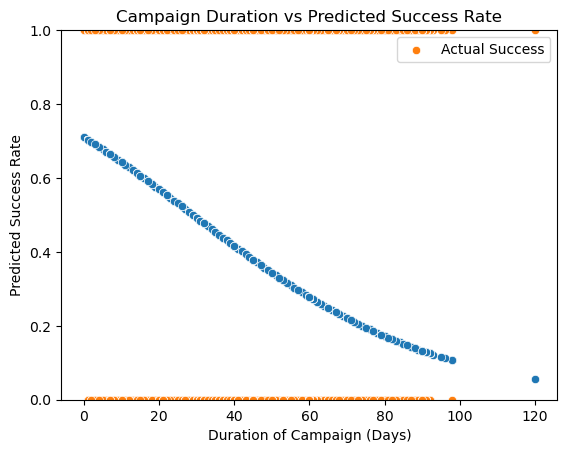

In [12]:
X1 = pd.DataFrame(kickstarter_data["duration_in_days"])
y1 = pd.Series(kickstarter_data["success"])
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state = 2950) 

time_model = LogisticRegression().fit(X1_train,y1_train)
coefficient = np.round(time_model.coef_[0][0], 2)
intercept = np.round(time_model.intercept_[0], 2)
print(f"The model's coefficient is: {coefficient}")
print(f"The model's intercept is: {intercept}")

time_hat_prediction = time_model.predict_proba(X1_train)
time_test_prediction = time_model.predict_proba(X1_test)

#run Logistic Regression on total data to visualize predictions
time_model = LogisticRegression().fit(X1,y1)
time_prediction = time_model.predict_proba(X1)
time_success = time_prediction[:,1]
kickstarter_data["time_success_prediction"] = time_success
sns.scatterplot(kickstarter_data, x = "duration_in_days", y = "time_success_prediction")
sns.scatterplot(kickstarter_data, x = "duration_in_days", y = "success",
                label = "Actual Success")

plt.title("Campaign Duration vs Predicted Success Rate")
plt.xlabel("Duration of Campaign (Days)")
plt.ylabel("Predicted Success Rate")
plt.ylim(0,1)
plt.show()

This graph shows that as the results are surprisingly not what we expected. As the time of the campaign increases, the probability of camaign success actually decreases. This may mean that campaigns are more likely to succeed early on in their campaign and their chances of success gradually decreases as time goes on.

### **Campaign's Original Currency vs Average Success Rate** <a name="original-currency-vs-average-success"></a>

We created a new dataframe named 'currency_success_df' to better understand the project's currency, number of successful projects for each respective currency, the total number of projects for each respective currency, to calculate the success rate for projects of each respective currency.

We also calculated the total number of different original currencies there were, which was 15.

In [13]:
currency_success_df = duckdb.sql("""
SELECT 
    original_currency,
    SUM(CASE 
        WHEN success = 1 THEN 1 
        END) AS num_successful,
    COUNT(*) AS total_projects,
    AVG(CASE 
        WHEN success = 1 THEN 1.0 
        ELSE 0.0 END) AS success_rate
FROM 
    kickstarter_data 
GROUP BY 
    original_currency
ORDER BY num_successful DESC
""").df()

num_diff_currencies = len(currency_success_df)
print(f"The number of different currencies in this dataset is: {num_diff_currencies}")

currency_success_df.iloc[:15]

The number of different currencies in this dataset is: 15


,original_currency,num_successful,total_projects,success_rate
0,USD,178334.0,381263,0.467745
1,GBP,28143.0,55268,0.509210
2,EUR,17256.0,41487,0.415938
3,CAD,10908.0,23889,0.456612
4,AUD,5162.0,12353,0.417874
5,HKD,3038.0,4350,0.698391
6,MXN,2204.0,6377,0.345617
7,SEK,1354.0,3139,0.431348
8,JPY,1289.0,2023,0.637173
9,SGD,1213.0,2331,0.520378


#### Horizontal Bar Graph <a name="avg-success-bar-graph"></a>

We also calculated the average success rate across all currencies, the min average success rate, and the max average success rate. We graphed the project currency vs average success rate for each respective currency using a horizontal bar graph. 

The horizontal bar graph below is not approximately normally distributed since the ordering of currencies is arbitrary, since currency is a categorical variable. Thus, we needed to pivot away from using a t-test, since we cannot use a t-test if the statistic that we are trying to test is not normally distributed. 

Kickstarter Project Overall Success Rate: 0.467
Average/Mean Success Rate Across Categories: 0.459
Minimum Success Rate of all currencies is 0.346
Median Success Rate Across Categories: 0.436
Maximum Success Rate of all currencies is 0.698


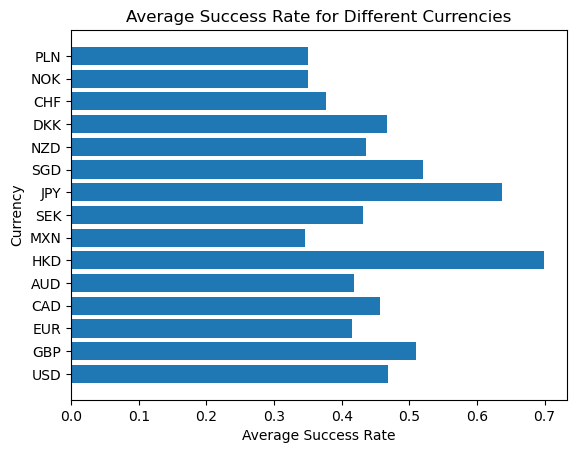

In [14]:
overall_success_rate = currency_success_df['num_successful'].sum() / len(kickstarter_data)
print(f"Kickstarter Project Overall Success Rate: {overall_success_rate:.3f}")

mean_success_rate = currency_success_df['success_rate'].mean()
print(f"Average/Mean Success Rate Across Categories: {mean_success_rate:.3f}")

min_success_rate = np.min(currency_success_df['success_rate'])
print(f"Minimum Success Rate of all currencies is {min_success_rate:.3f}")

median_success_rate = currency_success_df['success_rate'].median()
print(f"Median Success Rate Across Categories: {median_success_rate:.3f}")

max_success_rate = np.max(currency_success_df['success_rate'])
print(f"Maximum Success Rate of all currencies is {max_success_rate:.3f}")

currency_success_plot = plt.barh(currency_success_df["original_currency"],
                currency_success_df["success_rate"])

plt.xlabel("Average Success Rate")
plt.ylabel("Currency")
plt.title("Average Success Rate for Different Currencies")
plt.show()

<a name="avg-success-box-and-whisker"></a>
#### Box and Whisker Plot

Instead, we created a box and whisker plot to see if any of the datapoints could possibly be outliers and need to be examined more closely. 

It is important to note that the median plotted in this box plot is the mean of the averages of each currencies' average success rate, 0.459. The Overall Success Rate of all Kickstarter campaigns is 0.467, which differs slightly.

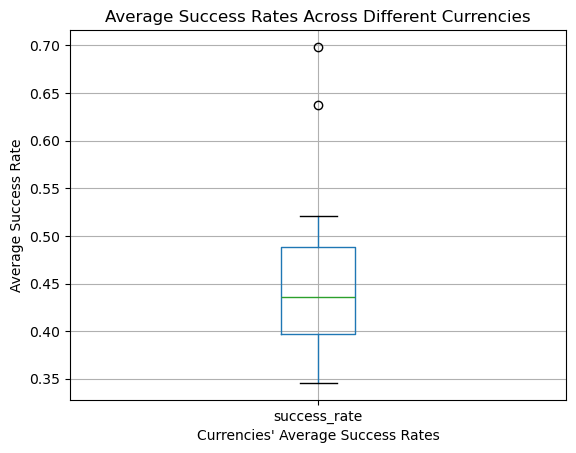

In [15]:
currency_success_df.boxplot(column = "success_rate")
plt.ylabel("Average Success Rate")
plt.xlabel("Currencies' Average Success Rates")
plt.title("Average Success Rates Across Different Currencies")
plt.show()

Using the box and whisker plot, we saw that two currencies lie outside of the IQR of the box and whiskers plot: 
JPY, with a 0.637173 success rate, and HKD, with a 0.698391 success rate which means they should be furthere examined. We also observed that MXN is not identified as an outlier in the box and whisker plot above, and is instead included in the first quartile, Q1. 

We wanted to figure out how many standard deviations away JPY and HKD were from the mean success rate, so we calculated the standard deviation and the z-scores of JPY and HKD.

In [16]:
std_currency_success = np.std(currency_success_df['success_rate'])
print(f"Standard Deviation of currency success rate: {np.round(std_currency_success, 3)}")

mean_success_rate = np.mean(currency_success_df['success_rate'])
print(f"Mean Success Rate: {np.round(mean_success_rate, 3)}")

currency_success_df['z_score'] = (currency_success_df['success_rate'] - mean_success_rate) / std_currency_success

Standard Deviation of currency success rate: 0.098
Mean Success Rate: 0.459


We then observed the z-scores for JPY and HKD. 
JPY is 1.823343 standard deviations from the mean and HKD is 2.448934 standard deviations from the mean. Since we cannot assume that the underlying data is not normally distributed, we are unable to determine whether these are or are not outliers with any degree of confidence.

In [17]:
currency_success_df.loc[currency_success_df["original_currency"] == 'JPY']

,original_currency,num_successful,total_projects,success_rate,z_score
8,JPY,1289.0,2023,0.637173,1.823343


In [18]:
currency_success_df.loc[currency_success_df["original_currency"] == 'HKD']

,original_currency,num_successful,total_projects,success_rate,z_score
5,HKD,3038.0,4350,0.698391,2.448934


### **Pre-registration 1: Multivariable Logistic Regression** <a name="logit-regression"></a>

In this section, we wanted to analyze whether having more predictors will have a stronger relationship with the success rate. The variables that we decided to include are:
- duration of project (duration_in_days)
- campaign goal (goal_usd)

In [19]:
kickstarter_train, kickstarter_test = train_test_split(kickstarter_data, test_size = 0.3, 
                                                       random_state = 2950)
X = sm.add_constant(kickstarter_train[["log_goal_usd", "duration_in_days"]]) 
y = kickstarter_train['success']

# Fit logistic regression model
logit_model = sm.Logit(y, X).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.644185
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:               377569
Model:                          Logit   Df Residuals:                   377566
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                 0.06754
Time:                        16:01:31   Log-Likelihood:            -2.4322e+05
converged:                       True   LL-Null:                   -2.6084e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.2915      0.020    163.400      0.000       3.252       3.331
log_goal_us

Since the p-values for both variables are 0.000 rounded to the third decimal, this means the p-value is significant as it is less than the alpha level of 0.05. This also indicates for both predictor, campaign goal and campaign duration, we reject the null hypothesis. The p-value of the log-likelihood ratio is also 0.000, meaning that the model itsself is significant as well and we can utilize it to make predictions. 

As the campaign goal increases, the log odds of success decreases. The coefficient for log_goal_usd is around -0.3149 which indicates with all else equal, for every 1% increase in the campaign goal, the odds of success are multipled by around 0.730, which is a decrease of 27% in odds. 

As the duration increases, the log odds of success decreases. The coefficient for duration_in_days is around -0.0230 which indicates with all else equal, for every additional increase in the campaign duration, the odds of success are multipled by around 0.977, which is a decrease of 2.3% in odds. This is interesting as it is different from our proposed alternative hypothesis that projects with a larger time difference between launched date and deadline date, or duration, will have a greater likelihood of success.

There are limitations to this regression as the constant value indicates that when the predictors variables are zero, the log odds of success is around 3.2869. However, realistically, it is not possible to have a campaign with 0 as its campaign goal and a campaign with a duration of 0. 

To see whether our model accurately predicts the success of our project, we calculated the precision, recall, and f1 score of our model on the test set. 

In [31]:
X_test = sm.add_constant(kickstarter_test[["log_goal_usd", "duration_in_days"]])
y_pred = logit_model.predict(X_test)
#convert to binary with a 0.5 threshold to use within evaluation metrics
y_pred_binary = (y_pred >= 0.5).astype(int)

precision = precision_score(y_pred_binary, kickstarter_test["success"])
recall = recall_score(y_pred_binary, kickstarter_test["success"])
f1score = f1_score(y_pred_binary, kickstarter_test["success"])

print(f"Precision: {precision.round(2)}")
print(f"Recall: {recall.round(2)}")
print(f"F1: {f1score.round(2)}")

Precision: 0.51
Recall: 0.61
F1: 0.55


Our precision score is 0.51, meaning that around 51% of the projects we predicted would be successful are actually successful. Our recall score is higher, meaning that 61% of our true successes are correctly predicted, showing that our model is a fairly good fit for the data, as most of the projects that are successful due to these two categories are accounted for in the model.The F1 score combines precision and recall and states that the harmonic mean of both is 55% correct predictions.  Overall, our model does a decent job at capturing all the data.

Next, we conduct a cross validation test on the entire dataset to ensure that our model isn't overfitting and see if it is generalizable.

### Cross Validation <a name="Cross-Validation"></a>

In [ ]:
def Normalizer(df_cols):
    scaler = preprocessing.StandardScaler().fit(df_cols)
    return(scaler.transform(df_cols))

In [66]:
inputs = ["log_goal_usd", "duration_in_days"]
y = kickstarter_data["success"]
X = Normalizer(kickstarter_data[inputs])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2950)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=2950)

kf = KFold(n_splits=6, shuffle=True, random_state=None)

precision_cv_list = []
recall_cv_list = []
f1score_cv_list = []

for fold in kf.split(X):
    
    logisticmodel = LogisticRegression().fit(X_train,y_train)
    
    precision_cv = cross_val_score(LogisticRegression(solver="liblinear"),
                X_valid, y_valid,
                cv=kf, scoring='precision')
    precision_cv_list.append(precision_cv)
    
    recall_cv = cross_val_score(LogisticRegression(solver="liblinear"),
                X_valid, y_valid,
                cv=kf, scoring='recall')
    recall_cv_list.append(recall_cv)

    f1score_cv = cross_val_score(LogisticRegression(solver="liblinear"),
                X_valid, y_valid,
                cv=kf, scoring='f1')
    f1score_cv_list.append(f1score_cv)
    
print(f"Mean precision across splits: {np.mean(precision_cv_list).round(2)}")
print(f"Std precision: {np.std(precision_cv_list).round(2)}")


print(f"Mean recall across splits: {np.mean(recall_cv_list).round(2)}")
print(f"Std recall: {np.std(recall_cv_list).round(2)}")


print(f"Mean F1 across splits: {np.mean(f1score_cv_list).round(2)}")
print(f"Std F1: {np.std(f1score_cv_list).round(2)}")


Mean precision across splits: 0.61
Std precision: 0.01
Mean recall across splits: 0.52
Std recall: 0.01
Mean F1 across splits: 0.56
Std F1: 0.01


We conducted a CV test across 6 splits, calculating the average precision, recall, and F1 score as well as the standard deviations for each of the validation sets. From the results, we see that the the mean precision is 0.61, so 61% of the projects that we predicted to be successful were actually successful. The recall is lower because of the tradeoff between precision and recall, but it still is pretty good as 52% of the successful projects were correctly predicted to be successful. The F1 score is similar to the F1 score we got from the test set, at 0.56. The standard deviations are also fairly small, meaning that there isn't huge outliers that our data fails to capture. From our CV test results, we see that our model can be generalizable and is not overfitting on one test set, as the evaluation metrics we got across all multiple folds are similar to the ones we got from our earlier evaluation metrics. 

### **Pre-registration 2: Original Currency & Success Rate** <a name="binomial-distributions"></a>
Using the possible outliers found in the box plot above (HKD, and MXN), we will plot two binomial distributions to see the probability density function for each respective currency. Using these distributions, we will be able to see if the actual HKD and MXN success rates are significantly greater than or less than the predicted probability distribution function.

### Binomial Distribution HKD <a name="binomial-distributions-hkd"></a>

In order to do so, we will use the normalized binomial distributions to determine whether our datapoints for HKD and MXM are within the range of the generated 1000 samples of the probability distribution.

First, calculated N, the number of successful HKD projects and p, the probability of success for campaigns of all other currencies.

In [ ]:
N = len(kickstarter_data[kickstarter_data["original_currency"] == "HKD"])
        # & (kickstarter_data["success"] == 1)])

num_successful_hkd = len(kickstarter_data[(kickstarter_data["original_currency"] == "HKD")
        & (kickstarter_data["success"] == 1)])

p = (len(kickstarter_data[kickstarter_data["success"] == 1]) 
     - N) / (len(kickstarter_data) - N)

print(f"The number of Total HKD Kickstarter campaigns: N = {N}")

print(f"The number of successful HKD campaigns: {num_successful_hkd}")

print(f"The probability of success for campaigns using other currencies: p = {np.round(p, 3)}")

We then found the mean and standard deviation of the data and printed them out. 
we then plotted a histogram using a binomial distribution to understand how frequently HKD campaigns succeeded using the N and p value we calculated, and we ran 1000 trials. 

In [ ]:
mean=N*p
std = np.sqrt(N*p*(1-p))
print("Mean: ", mean)
print("Standard Deviation: ", std)

hkd_dist = np.random.binomial(N, p, size = 1000)
plt.hist(hkd_dist)
plt.xlabel("Number of Successful HKD Kickstarter Campaigns")
plt.ylabel("Frequency")

We set the density to True in order to compare the data according to a normalized y value, in this case, it is the value of the probability density function at each bin. 

In [ ]:
plt.hist(hkd_dist, density=True, bins=20)
plt.xlabel("Number of Successful HKD Kickstarter Campaigns")
plt.ylabel("Probability Density Function (Normalized)")
plt.show()

Finally, we added a vertical line to the histogram that represented the number of successful HKD campaigns in the Kickstarter data, 3038. Comparing this value to the binomial distribution we plotted using N and p, we observed that it is not within the range generated using the probability distribution over 1000 trials. 

Thus, this datapoint of x = 3038 successful HKD kickstarter campaigns is most likely an outlier.

In [ ]:
plt.hist(hkd_dist, density=True, bins=20)
plt.xlabel("Number of Successful HKD Campaigns")
plt.ylabel("Probability Density Function (Normalized)")
plt.vlines(x=3038, ymin=0, ymax=0.009, color='black')
plt.show()

### Binomial Distribution MXN <a name="binomial-distributions-hkd"></a>

Now, we will repeat the same procedure as above to check if MXN is an outlier.

First we found the N, p, and the number of successful Mexican Kickstarter Campaigns.

In [ ]:
N = len(kickstarter_data[kickstarter_data["original_currency"] == "MXN"])

num_successful_mxn = len(kickstarter_data[(kickstarter_data["original_currency"] == "MXN")
        & (kickstarter_data["success"] == 1)])

p = (len(kickstarter_data[kickstarter_data["success"] == 1]) 
     - N) / (len(kickstarter_data) - N)

print(f"The number of Total MXN Kickstarter campaigns: N = {N}")

print(f"The number of successful MXN campaigns: {num_successful_mxn}")

print(f"The probability of success for campaigns using other currencies: p = {np.round(p, 3)}")

Then, we found the mean and standard deviation of the Kickstarter data using the calculated values above and printed them out. 

We then plotted a histogram using a binomial distribution to understand how frequently MXN campaigns succeeded using the N and p value we calculated, by running 1000 trials. 

In [ ]:
mean=N*p
std = np.sqrt(N*p*(1-p))
print("Mean: ", mean)
print("Standard Deviation: ", std)

mxn_dist = np.random.binomial(N, p, size = 1000)
plt.hist(mxn_dist)
plt.xlabel("Number of Successful MXN Kickstarter Campaigns")
plt.ylabel("Frequency")

Normalization: To normalize, we set the density arguement to True. 

In [ ]:
plt.hist(mxn_dist, density=True, bins=20)
plt.xlabel("Number of Successful MXN Campaigns")
plt.ylabel("Probability Density Function (Normalized)")
plt.show()

After adding a vertical line representing the number of successful MXN Campaigns, 2204. Since this datapoint is not within the range of the generated 1000 samples of the probability distribution, we can say that x=2204 successful Mexican currencies is an outlier.

In [ ]:
plt.hist(mxn_dist, density=True, bins=20)
plt.xlabel("Number of Successful MXN Campaigns")
plt.ylabel("Probability Density Function (Normalized)")
plt.vlines(x=2204, ymin=0, ymax=0.007, color='black')
plt.show()

## **Evaluation of Significance** <a name="evaluation-of-significance"></a>

#### **Evaluation of Signifiance - Pre-registration 1: Multivariable Logistic Regression** <a name="eval-significance-1"></a>
Bootstrapping Hypothesis on multivariable logistic regression to determine the confidence interval and see if the regression coefficient falls within this confidence interval. 

In [ ]:
n_iterations = 100
bootstrap_coefs = np.zeros((n_iterations, 3))
X = sm.add_constant(kickstarter_train[['log_goal_usd', 'duration_in_days']]) 
y = kickstarter_train['success'] 
initial_model = sm.Logit(y,X).fit()

for i in range(n_iterations):
    boot_sample = kickstarter_train.sample(n=len(kickstarter_train), replace=True)
    X_boot = sm.add_constant(boot_sample[['log_goal_usd', 'duration_in_days']]) 
    y_boot = boot_sample['success'] 
    boot_model = sm.Logit(y_boot, X_boot).fit(disp=0)
    bootstrap_coefs[i] = boot_model.params

#Visualizing
plt.figure(figsize=(14, 6)) 
plt.subplot(1, 3, 1) 
plt.hist(bootstrap_coefs[:, 0], bins=30, color='blue', alpha=0.7, edgecolor='black') 
plt.title('Distribution of Intercept Coefficients') 
plt.axvline(x=3.2915, color='red')

plt.subplot(1, 3, 2) 
plt.hist(bootstrap_coefs[:, 1], bins=30, color='green', alpha=0.7, edgecolor='black') 
plt.title('Distribution of Campaign Goal Coefficients') 
plt.axvline(x=-0.3151, color='red')

plt.subplot(1, 3, 3) 
plt.hist(bootstrap_coefs[:, 2], bins=30, color='purple', alpha=0.7, edgecolor='black') 
plt.title('Distribution of Duration Coefficients')
plt.axvline(x=-0.0231 , color='red')
plt.show()

Visualizing our data and seeing that the regression coefficients fall within the middle of the confidence interval, we can conclude that our results are reproducible. 

#### **Evaluation of Signifiance - Pre-registration 2: Original Currency & Success Rate** <a name="eval-significance-2"></a>

In order to verify our hypotheses and the two observations of JPY and HKD using the box plot, we calculated standard deviations away from the mean (z-score) to determine whether HKD, JPY, and MXN are significantly different than the average campaign of other currencies. We want to to determine if these currencies are significantly more likely or less likely to impact a campaign's success rates.

HKD's Z-Score is approximately 31.21. 
The datapoint of 3038 successful HKD Kickstarter Campaigns is approximately 31 standard deviations away from the mean (z-score).

In [ ]:
N = len(kickstarter_data[kickstarter_data["original_currency"] == "HKD"])

num_successful_hkd = len(kickstarter_data[(kickstarter_data["original_currency"] == "HKD")
        & (kickstarter_data["success"] == 1)])

print(f"Number of successful HKD campaigns: {num_successful_hkd}")

p = (len(kickstarter_data[kickstarter_data["success"] == 1]) 
     - N) / (len(kickstarter_data) - N)

In [ ]:
mean = N*p
std = np.sqrt(N*p*(1-p))
datapoint = 3038

z_mean = (datapoint - mean) / std
print(z_mean)

JPY's Z-Score is approximately 15.55 standard deviations above the mean.

In [ ]:
N = len(kickstarter_data[kickstarter_data["original_currency"] == "JPY"])

num_successful_jpy = len(kickstarter_data[(kickstarter_data["original_currency"] == "JPY")
        & (kickstarter_data["success"] == 1)])

print(f"Number of successful JPY campaigns: {num_successful_jpy}")

p = (len(kickstarter_data[kickstarter_data["success"] == 1]) 
     - N) / (len(kickstarter_data) - N)

In [ ]:
mean = N*p
std = np.sqrt(N*p*(1-p))
datapoint = 1289

z_mean = (datapoint - mean) / std
print(z_mean)

MXN's Z-Score - 18.39 standard deviations below the mean.

In [ ]:
N = len(kickstarter_data[kickstarter_data["original_currency"] == "MXN"])

num_successful_mxn = len(kickstarter_data[(kickstarter_data["original_currency"] == "MXN")
        & (kickstarter_data["success"] == 1)])

print(f"Number of successful HKD campaigns: {num_successful_mxn}")


p = (len(kickstarter_data[kickstarter_data["success"] == 1]) 
     - N) / (len(kickstarter_data) - N)

In [ ]:
mean=N*p
std = np.sqrt(N*p*(1-p))
datapoint = 2204

z_mean = (datapoint - mean) / std
print(z_mean)

In order to have a metric to compare these z-scores to, we chose to find the z-score of SGD, whose success rate is closest to the mean success rate of the entire kickstarter dataset.

SGD's z-score is approximately 5.41. The datapoint of 1213 successful SGD Kickstarter campaigns is approximately 5 standard deviations from the mean.

Although SGD's z-score is greater than 3 standard deviations from the mean as an "average" currency, the success rates of the other currencies can be interpreted based off of this z-score.

In [ ]:
N = len(kickstarter_data[kickstarter_data["original_currency"] == "SGD"])

num_successful_sgd = len(kickstarter_data[(kickstarter_data["original_currency"] == "SGD")
        & (kickstarter_data["success"] == 1)])

print(f"Number of successful SGD campaigns: {num_successful_sgd}")

p = (len(kickstarter_data[kickstarter_data["success"] == 1]) 
     - N) / (len(kickstarter_data) - N)

In [ ]:
mean=N*p
std = np.sqrt(N*p*(1-p))
datapoint = 1213

z_mean = (datapoint - mean) / std
print(z_mean)

**Calculated Z-Scores:** 
- HKD: 31.212900897983324
- JPY: 15.547845560773935
- MXN: -18.38856710286488
- SGD: 5.4135175461672

Using these z-Scores, we can determine that HKD projects are the furthest away from the mean, since they have the highest absolute value of its z-score (31.21). When compared to the z-score of a currency whose success rate is closer to the mean, SGD (5.41), JPY and MXN (15.55 and -18.39) are around least 3 times as far away from the mean in each respective direction. 

Our hypothesis was proven correct that HKD is significantly more successful than other Kickstarter campaigns. We can reject the null hypothesis that HKD is not significantly more successful than other Kickstarter campaigns, on average, since it is approximately 31.21 standard deviations above the mean rate of success of the entire dataset.

Our hypothesis that we accept the null hypothesis that MXN is not significantly less successful than other Kickstarter campaigns was disproven. We can also reject the null hypothesis that MXN is not significantly less successful than other Kickstarter campaigns, on average, since it is approximately 18.39 standard deviations below the mean rate of success of the entire dataset.

Visualizing our data, we can see that our model coefficients fall within the distributions, around the middle of the data, indicating that it is within the 95% confidence interval for each respective distribution.

## **Conclusions** <a name="conclusion"></a>

#### **Success varies by category**

Success rate differs by category and over time, with the category Film & Video having a relatively stable success rate around 0.4, while Games and Music both generally increased over time. This could indicate that backers' interests in these categories increased over time and so, more projects in these respective categories were backed by these backers and succeeded. In the case of Film & Video, it may be that the backer community for this category is relatively the same throughout the years. Games and Comics in the recent years 2021-2023 had the most success out of all the categories which may indicate that campaigns are strongly supported and these categories may be the most likely to succeed in the coming years as well. 

#### **Higher campaign goals and higher duration decreases probability of success**

We hypothesized that higher campaign goals would decrease probability and higher duration would increase probability, however, we were mistaken in that latter as the results indicate that higher duration increases probability of success. This is interesting to note as this may be related to how success is not just limited to the factors we were able to consider in our dataset. Since there was a higher probability of success with lower campaign durations, this may indicate that many projects have a strong backing even prior to launching their project on Kickstarter. This would explain why campaigns were able to reach their campaign goal and become successful in such a short amount of time. 

Through analyzing our multivariable regression, we got a p-value of less than 0.05, in which we were able to reject both our null hypotheses. 

#### **Bootstrap sampling showed that the results of our multivariable logistic regression are reproducible**

Performing bootstrapping sampling showed that the coefficients of the multivariable regression model with campaign goal and duration are within the confidence interval determined by bootstrap sampling. This indicates higher campaign goals have a lower likelihood of success and longer campaign durations have a lower likelihood of success.

#### **Projects using currencies showed that HKD, JPY, and MXN have significantly different than currencies with success rates closer to the mean, like SGD.**
By calculating the Z-Scores for HKD, JPY, MXN, and SGD, we concluded that HKD is the most likely to be the best currency to have a Kickstarter campaign in, if you want the campaign to be successful, and then JPY is the second most likely.

We also concluded that MXN is the worst currency to have a Kickstarter campaign if you want the campaign to be successful.

HKD had the greatest absolute value of their z-score of approximately 31.21 above the mean. 
MXN had the second greatest absolute value of their z-score of approximately 18.39 below the mean. 
JPY had the greatest absolute value of their z-score of approximately 15.55 above the mean. 
SGD had the greatest absolute value of their z-score.


To maximize the changes of a success Kickstarter campaign, the campaign should be in the Games or Comics category, have a lower campaign goal and run for a lower duration, and be conducted in the original currency with a higher success rate like HKD.

## **Limitations** <a name="limitations"></a>

There are several limitations to our research as the data is limited to the Kickstarter public dataset. Since many variables on our public data tsv are restricted, including the project description, we can’t draw a clear relationship between what exactly about a specific category that leads to it being more or less successful than other categories. This affects the meaning of our results because there are unclear causes on why successful a project is successful, as we're only relying on the labels on the Categories of our cleaned data. We can answer our research question on which categories are successful, but can't expand further on the reasons why. 

The cleaned dataset used was also limited as we only used a portion of all the Kickstarter projects. We decided to remove projects that did not have a STATE of success or failed, which were cancelled and suspended campaigns. This indicates that our data analysis is based on solely on success or failed projects, and does not take into account cancelled or suspended campaigns. This binary view on the data can exclude projects that were close to succeeding or had a high probability of succeeding but were dropped last minute. Had those rows been labelled as successful, we could’ve used them to either enforce or counter our results. 

Another limitation in our collected data is that even though we can say that one factor is more directly related to success, there may be outside confounding variables (such as previous popularity of project creator, social media handles, advertising/promotion) that can influence each factor. So, we might not be finding the root causes of successes, and can only base our predictions on the factors given to us.

## **Acknowledgements and Bibliography** <a name="acknowledgements"></a>


We'd like to thank our TAs, Nuo Cen and Anna Choi, for answering our questions and always being responsive to any concerns that were brought up between phases of our data science project. We would also like to thank the TAs in charge of our discussion sections who were genuinely curious about our projects and excited to see our graphs, especially Grad TA Nicolas Guerra. 

Thank you to all the TAs who were at consulting hours and helped us develop our coding data science skills.

Below are links that we used as reference to help us debug our code.

Logit Model Summary https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/ and https://stackoverflow.com/questions/50350816/logistic-regression-get-the-sm-logit-values-python-statsmodels

Side by side plots: https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side

Case Expression in SQL: https://www.w3schools.com/sql/sql_case.asp 

Bootstrapping: https://stackoverflow.com/questions/65175344/bootstrapping-with-logistic-regression-in-python-constructing-test-vector

Sources for previous research that has been done using the same raw dataset: 

Kickstarter projects data exploration. (n.d.). https://rstudio-pubs-static.s3.amazonaws.com/121859_4c9182858d7941a08244c587a54413b9.html 

Kim, L. (2024, January 29). Kickstarter Data Exploration. https://rstudio-pubs-static.s3.amazonaws.com/1143113_fa2f87ec834e4b0aa8e1a92266455c05.html 